In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
tf.__version__

'2.7.0'

In [4]:
keras.__version__

'2.7.0'

In [5]:
fashion = keras.datasets.fashion_mnist

In [6]:
(x_train_full, y_train_full), (x_test, y_test) = fashion.load_data()

In [7]:
x_train_full.shape, x_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [8]:
x_valid, x_train = x_train_full[:5000] / 255.0, x_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [11]:
y_train.shape

(55000,)

In [12]:
class_names[y_train[0]]

'Coat'

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
keras.utils.plot_model(model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [16]:
model.layers

In [17]:
hidden1 = model.layers[1]

In [18]:
hidden1.name

'dense'

In [19]:
weights, biases = hidden1.get_weights()

In [20]:
weights

array([[-0.06751125,  0.00775318, -0.02924701, ...,  0.04567416,
         0.03267841,  0.0380911 ],
       [ 0.03457145, -0.03649315, -0.02032341, ...,  0.01309534,
        -0.01842552, -0.00871204],
       [-0.0468975 ,  0.03386655,  0.0312499 , ..., -0.00492282,
        -0.0424252 ,  0.01352705],
       ...,
       [-0.07336517,  0.07078707, -0.05570103, ..., -0.02187962,
         0.07143778,  0.00628284],
       [ 0.05305302, -0.04337604, -0.05876186, ...,  0.07092023,
        -0.02913256,  0.03021232],
       [ 0.03397132,  0.05362034, -0.03415754, ...,  0.00965808,
         0.03216071, -0.0649694 ]], dtype=float32)

In [21]:
weights.shape

(784, 300)

In [22]:
biases.shape

(300,)

In [23]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [24]:
history = model.fit(x_train, y_train, epochs=30,validation_data=(x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7105 - accuracy: 0.7681 - val_loss: 0.5297 - val_accuracy: 0.8112
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4841 - accuracy: 0.8315 - val_loss: 0.4393 - val_accuracy: 0.8520
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4419 - accuracy: 0.8452 - val_loss: 0.4082 - val_accuracy: 0.8586
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4149 - accuracy: 0.8543 - val_loss: 0.4061 - val_accuracy: 0.8614
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3955 - accuracy: 0.8611 - val_loss: 0.3869 - val_accuracy: 0.8610
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3807 - accuracy: 0.8663 - val_loss: 0.3878 - val_accuracy: 0.8670
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3673 - accuracy: 0.8703 - val_loss: 0.3663 - val_accuracy:

(0.0, 1.0)

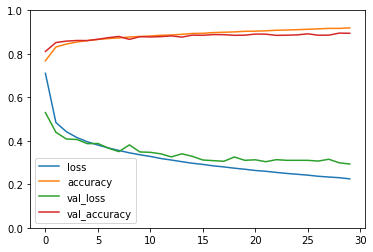

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
# plt.grid(True)
plt.gca().set_ylim(0,1)

In [26]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 58.7773 - accuracy: 0.8595


[58.77726745605469, 0.859499990940094]

In [27]:
x_new = x_test[:3]

In [28]:
y_proba = model.predict(x_new)

In [29]:
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [30]:
y_pred = model.predict_classes(x_new)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [31]:
import numpy as np
y_pred=model.predict(x_new)
classes_x=np.argmax(y_pred,axis=1)

In [32]:
y_pred

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [33]:
classes_x

array([9, 2, 1], dtype=int64)

In [34]:
np.array(class_names)[classes_x]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [35]:
##

In [36]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [37]:
housing = fetch_california_housing()

In [38]:
x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

In [39]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full)

In [40]:
scaler = StandardScaler()

In [41]:
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [42]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=x_train.shape[1:]),
    keras.layers.Dense(1)
])

In [43]:
model.compile(loss="mean_squared_error", optimizer="sgd")

In [44]:
history = model.fit(x_train, y_train, epochs=20,
    validation_data=(x_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9263 - val_loss: 0.5904
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0728 - val_loss: 0.5147
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5328 - val_loss: 0.4577
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4360 - val_loss: 0.4273
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4310 - val_loss: 0.4251
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4098 - val_loss: 0.4402
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4325 - val_loss: 0.4063
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3978 - val_loss: 0.3998
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3910 - val_loss: 0.3975
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3870 - val_loss: 0.3945

In [45]:
mse_test = model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3570


In [46]:
x_new = x_test[:3]

In [47]:
y_pred = model.predict(x_new)

In [48]:
y_pred

array([[2.3280334],
       [1.450681 ],
       [1.0356427]], dtype=float32)

In [49]:
input_ = keras.layers.Input(shape=x_train.shape[1:])

In [50]:
hidden1 = keras.layers.Dense(30, activation='relu')(input_)

In [51]:
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)

In [52]:
concat = keras.layers.Concatenate()([input_, hidden2])

In [53]:
output = keras.layers.Dense(1)(concat)

In [54]:
model = keras.Model(inputs=[input_], outputs=[output])

In [55]:
model.compile(loss="mean_squared_error", optimizer="sgd")

In [56]:
history = model.fit(x_train, y_train, epochs=20,
    validation_data=(x_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0514 - val_loss: 0.5800
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0537 - val_loss: 0.5250
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7061 - val_loss: 0.4881
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4751 - val_loss: 0.4945
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5996 - val_loss: 0.4524
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4397 - val_loss: 0.5111
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4227 - val_loss: 0.4144
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4346 - val_loss: 0.4170
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4925 - val_loss: 0.4008
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3930 - val_loss: 0.3943

In [57]:
mse_test = model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3606


In [58]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])


In [59]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
x_train_A, x_train_B = x_train[:, :5], x_train[:, 2:]
x_valid_A, x_valid_B = x_valid[:, :5], x_valid[:, 2:]
x_test_A, x_test_B = x_test[:, :5], x_test[:, 2:]
x_new_A, x_new_B = x_test_A[:3], x_test_B[:3]
history = model.fit((x_train_A, x_train_B), y_train, epochs=20,
 validation_data=((x_valid_A, x_valid_B), y_valid))
mse_test = model.evaluate((x_test_A, x_test_B), y_test)
y_pred = model.predict((x_new_A, x_new_B))


Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 2.0977 - val_loss: 0.8381
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7556 - val_loss: 0.6978
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6130 - val_loss: 0.5990
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5673 - val_loss: 0.5709
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5483 - val_loss: 0.5534
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5352 - val_loss: 0.5427
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5291 - val_loss: 0.5319
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5197 - val_loss: 0.5254
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5121 - val_loss: 0.5184
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5069 - val_loss: 0.5160

In [60]:
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])


In [61]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")


In [62]:
history = model.fit(
 [x_train_A, x_train_B], [y_train, y_train], epochs=20,
 validation_data=([x_valid_A, x_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 0.8315 - main_output_loss: 0.7597 - aux_output_loss: 1.4770 - val_loss: 0.5648 - val_main_output_loss: 0.5047 - val_aux_output_loss: 1.1062
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5678 - main_output_loss: 0.5168 - aux_output_loss: 1.0272 - val_loss: 0.5347 - val_main_output_loss: 0.4889 - val_aux_output_loss: 0.9468
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5454 - main_output_loss: 0.5067 - aux_output_loss: 0.8939 - val_loss: 0.5562 - val_main_output_loss: 0.5251 - val_aux_output_loss: 0.8359
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5335 - main_output_loss: 0.5039 - aux_output_loss: 0.8003 - val_loss: 0.4912 - val_main_output_loss: 0.4620 - val_aux_output_loss: 0.7541
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4862 - main_output_loss: 0.4581 - aux_output_loss: 0.7395 - val_loss

In [63]:
total_loss, main_loss, aux_loss = model.evaluate(
 [x_test_A, x_test_B], [y_test, y_test])

162/162 [==============================] - 0s 2ms/step - loss: 0.3699 - main_output_loss: 0.3536 - aux_output_loss: 0.5172


In [64]:
y_pred_main, y_pred_aux = model.predict([x_new_A, x_new_B])

In [65]:
class WideAndDeepModel(keras.Model):
 def __init__(self, units=30, activation="relu", **kwargs):
     super().__init__(**kwargs) # handles standard args (e.g., name)
     self.hidden1 = keras.layers.Dense(units, activation=activation)
     self.hidden2 = keras.layers.Dense(units, activation=activation)
     self.main_output = keras.layers.Dense(1)
     self.aux_output = keras.layers.Dense(1)
 def call(self, inputs):
     input_A, input_B = inputs
     hidden1 = self.hidden1(input_B)
     hidden2 = self.hidden2(hidden1)
     concat = keras.layers.concatenate([input_A, hidden2])
     main_output = self.main_output(concat)
     aux_output = self.aux_output(hidden2)
     return main_output, aux_output
model = WideAndDeepModel()

In [66]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
 import time
 run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
 return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22'

In [67]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(x_train, y_train, epochs=30,
 validation_data=(x_valid, y_valid),
 callbacks=[tensorboard_cb])

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [69]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
 for step in range(1, 1000 + 1):
     tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
     data = (np.random.randn(100) + 2) * step / 100 # some random data
     tf.summary.histogram("my_hist", data, buckets=50, step=step)
     images = np.random.rand(2, 32, 32, 3) # random 32×32 RGB images
     tf.summary.image("my_images", images * step / 1000, step=step)
     texts = ["The step is " + str(step), "Its square is " + str(step**2)]
     tf.summary.text("my_text", texts, step=step)
     sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
     audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
     tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)


In [71]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
 model = keras.models.Sequential()
 model.add(keras.layers.InputLayer(input_shape=input_shape))
 for layer in range(n_hidden):
     model.add(keras.layers.Dense(n_neurons, activation="relu"))
 model.add(keras.layers.Dense(1))
 optimizer = keras.optimizers.SGD(lr=learning_rate)
 model.compile(loss="mse", optimizer=optimizer)
 return model

In [74]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

<ipython-input-74-651c14c6d32f>:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [75]:
keras_reg.fit(x_train, y_train, epochs=10,
 validation_data=(x_valid, y_valid),
 callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(x_test, y_test)
y_pred = keras_reg.predict(x_new)


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.3952 - val_loss: 0.7449
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 1.0863 - val_loss: 0.7117
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8153 - val_loss: 0.9442
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6196 - val_loss: 0.5923
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5668 - val_loss: 0.5618
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5421 - val_loss: 0.5444
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5233 - val_loss: 0.5201
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5062 - val_loss: 0.5066
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4956 - val_loss: 0.4974
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.4884


In [77]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {
 "n_hidden": [0, 1, 2, 3],
 "n_neurons": np.arange(1, 100),
 "learning_rate": reciprocal(3e-4, 3e-2),
}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(x_train, y_train, epochs=100,
 validation_data=(x_valid, y_valid),
 callbacks=[keras.callbacks.EarlyStopping(patience=10)])

C:\Users\HP\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 3.5211 - val_loss: 1.7155
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 1.3325 - val_loss: 1.0688
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.9376 - val_loss: 0.8786
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8301 - val_loss: 0.8104
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7737 - val_loss: 0.7687
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7412 - val_loss: 0.7396
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7165 - val_loss: 0.7168
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6974 - val_loss: 0.6982
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6801 - val_loss: 0.6814
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6652 - val_lo

242/242 [==============================] - 1s 2ms/step - loss: 0.4282 - val_loss: 0.4422
Epoch 82/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4277 - val_loss: 0.4421
Epoch 83/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4270 - val_loss: 0.4416
Epoch 84/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4263 - val_loss: 0.4402
Epoch 85/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4256 - val_loss: 0.4397
Epoch 86/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4250 - val_loss: 0.4389
Epoch 87/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4244 - val_loss: 0.4393
Epoch 88/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4237 - val_loss: 0.4377
Epoch 89/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4233 - val_loss: 0.4371
Epoch 90/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4225 - val_loss: 

C:\Users\HP\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 3.6631 - val_loss: 1.6848
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 1.2088 - val_loss: 0.9251
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8163 - val_loss: 0.7672
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7021 - val_loss: 0.7040
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6594 - val_loss: 0.6719
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6359 - val_loss: 0.6507
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6192 - val_loss: 0.6349
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6056 - val_loss: 0.6218
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5942 - val_loss: 0.6108
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5838 - val_loss: 0.6012
E

242/242 [==============================] - 1s 2ms/step - loss: 0.4297 - val_loss: 0.4435
Epoch 82/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4291 - val_loss: 0.4422
Epoch 83/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4283 - val_loss: 0.4415
Epoch 84/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4278 - val_loss: 0.4414
Epoch 85/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4272 - val_loss: 0.4404
Epoch 86/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4265 - val_loss: 0.4401
Epoch 87/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4259 - val_loss: 0.4389
Epoch 88/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4255 - val_loss: 0.4380
Epoch 89/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4248 - val_loss: 0.4377
Epoch 90/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4243 - val_loss: 

C:\Users\HP\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 2.3369 - val_loss: 1.1490
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.9301 - val_loss: 0.8438
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7621 - val_loss: 0.7620
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6982 - val_loss: 0.7185
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6632 - val_loss: 0.6895
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6400 - val_loss: 0.6685
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6227 - val_loss: 0.6518
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6090 - val_loss: 0.6385
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5977 - val_loss: 0.6273
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5879 - val_loss: 0.6171
E

242/242 [==============================] - 1s 2ms/step - loss: 0.4313 - val_loss: 0.4525
Epoch 82/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4306 - val_loss: 0.4519
Epoch 83/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4299 - val_loss: 0.4517
Epoch 84/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4294 - val_loss: 0.4504
Epoch 85/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4285 - val_loss: 0.4493
Epoch 86/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4280 - val_loss: 0.4492
Epoch 87/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4275 - val_loss: 0.4485
Epoch 88/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4267 - val_loss: 0.4477
Epoch 89/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4261 - val_loss: 0.4474
Epoch 90/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4255 - val_loss: 

C:\Users\HP\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 6.0889 - val_loss: 5.1276
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 4.6320 - val_loss: 3.9782
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 3.5916 - val_loss: 3.1402
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 2.8381 - val_loss: 2.5248
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 2.2889 - val_loss: 2.0700
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 1.8861 - val_loss: 1.7317
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 1.5878 - val_loss: 1.4790
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 1.3659 - val_loss: 1.2889
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 1.1998 - val_loss: 1.1456
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 1.0749 - val_loss: 1.0370
E

242/242 [==============================] - 1s 2ms/step - loss: 0.5654 - val_loss: 0.5701
Epoch 82/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5646 - val_loss: 0.5693
Epoch 83/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5638 - val_loss: 0.5684
Epoch 84/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5631 - val_loss: 0.5677
Epoch 85/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5623 - val_loss: 0.5669
Epoch 86/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5616 - val_loss: 0.5661
Epoch 87/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5609 - val_loss: 0.5654
Epoch 88/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5602 - val_loss: 0.5647
Epoch 89/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5595 - val_loss: 0.5639
Epoch 90/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5588 - val_loss: 

C:\Users\HP\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 7.0823 - val_loss: 5.9362
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 5.4055 - val_loss: 4.6249
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 4.2020 - val_loss: 3.6618
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 3.3264 - val_loss: 2.9485
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 2.6838 - val_loss: 2.4189
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 2.2093 - val_loss: 2.0231
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 1.8565 - val_loss: 1.7263
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 1.5931 - val_loss: 1.5026
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 1.3953 - val_loss: 1.3334
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 1.2461 - val_loss: 1.2046
E

242/242 [==============================] - 0s 2ms/step - loss: 0.5783 - val_loss: 0.5907
Epoch 82/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5770 - val_loss: 0.5894
Epoch 83/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5759 - val_loss: 0.5881
Epoch 84/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5747 - val_loss: 0.5868
Epoch 85/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5736 - val_loss: 0.5856
Epoch 86/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5724 - val_loss: 0.5844
Epoch 87/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5714 - val_loss: 0.5832
Epoch 88/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5703 - val_loss: 0.5821
Epoch 89/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5693 - val_loss: 0.5810
Epoch 90/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5683 - val_loss: 

C:\Users\HP\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 6.3194 - val_loss: 5.5754
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 4.7410 - val_loss: 4.2237
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 3.6162 - val_loss: 3.2537
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 2.8068 - val_loss: 2.5514
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 2.2195 - val_loss: 2.0394
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 1.7906 - val_loss: 1.6640
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 1.4755 - val_loss: 1.3872
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 1.2430 - val_loss: 1.1822
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 1.0706 - val_loss: 1.0298
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.9424 - val_loss: 0.9161
E

242/242 [==============================] - 1s 2ms/step - loss: 0.5313 - val_loss: 0.5406
Epoch 82/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5312 - val_loss: 0.5404
Epoch 83/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5310 - val_loss: 0.5402
Epoch 84/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5308 - val_loss: 0.5399
Epoch 85/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5306 - val_loss: 0.5397
Epoch 86/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5304 - val_loss: 0.5395
Epoch 87/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5302 - val_loss: 0.5394
Epoch 88/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5299 - val_loss: 0.5391
Epoch 89/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5297 - val_loss: 0.5389
Epoch 90/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5296 - val_loss: 

C:\Users\HP\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.8079 - val_loss: 0.6461
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 1.7396 - val_loss: 1.4138
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 1.2716 - val_loss: 0.5688
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5953 - val_loss: 0.5252
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5008 - val_loss: 0.4955
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4821 - val_loss: 0.4718
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4627 - val_loss: 0.4559
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4454 - val_loss: 0.4446
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4369 - val_loss: 0.4402
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4288 - val_loss: 0.4276
E

242/242 [==============================] - 1s 2ms/step - loss: 0.3417 - val_loss: 0.3482
Epoch 82/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3419 - val_loss: 0.3470
Epoch 83/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3404 - val_loss: 0.3576
Epoch 84/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3410 - val_loss: 0.3469
Epoch 85/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3400 - val_loss: 0.3469
Epoch 86/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3393 - val_loss: 0.3479
Epoch 87/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3398 - val_loss: 0.3463
Epoch 88/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3381 - val_loss: 0.3514
Epoch 89/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3388 - val_loss: 0.3475
Epoch 90/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3386 - val_loss: 

C:\Users\HP\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.3047 - val_loss: 0.7119
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6484 - val_loss: 0.6300
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5810 - val_loss: 0.5681
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5350 - val_loss: 0.5338
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5226 - val_loss: 0.5105
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4937 - val_loss: 0.4956
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4797 - val_loss: 0.4907
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4666 - val_loss: 0.4756
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4615 - val_loss: 0.4681
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4552 - val_loss: 0.4607
E

242/242 [==============================] - 1s 2ms/step - loss: 0.3421 - val_loss: 0.3603
Epoch 82/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3397 - val_loss: 0.3701
Epoch 83/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3572 - val_loss: 0.3589
Epoch 84/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3389 - val_loss: 0.3567
Epoch 85/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3463 - val_loss: 0.3561
Epoch 86/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3364 - val_loss: 0.3580
Epoch 87/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3362 - val_loss: 0.3567
Epoch 88/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3357 - val_loss: 0.3536
Epoch 89/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3343 - val_loss: 0.3616
Epoch 90/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4450 - val_loss: 

C:\Users\HP\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.5176 - val_loss: 0.6846
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6529 - val_loss: 0.6180
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5739 - val_loss: 0.5680
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5336 - val_loss: 0.5362
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5079 - val_loss: 0.5169
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4905 - val_loss: 0.4997
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4778 - val_loss: 0.4877
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4673 - val_loss: 0.4792
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4590 - val_loss: 0.4706
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4522 - val_loss: 0.4660
E

242/242 [==============================] - 1s 2ms/step - loss: 0.3465 - val_loss: 0.3734
Epoch 82/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3463 - val_loss: 0.3608
Epoch 83/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3500 - val_loss: 0.3604
Epoch 84/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3452 - val_loss: 0.3568
Epoch 85/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3419 - val_loss: 0.3594
Epoch 86/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3484 - val_loss: 0.3728
Epoch 87/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3512 - val_loss: 0.3604
Epoch 88/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3473 - val_loss: 0.3614
Epoch 89/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3422 - val_loss: 0.3576
Epoch 90/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3399 - val_loss: 

C:\Users\HP\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.4030 - val_loss: 0.7903
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7163 - val_loss: 0.6731
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6739 - val_loss: 0.6257
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7231 - val_loss: 0.5633
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.9079 - val_loss: 0.5785
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7798 - val_loss: 0.5321
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5435 - val_loss: 0.5198
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5049 - val_loss: 0.5007
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4904 - val_loss: 0.4936
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4819 - val_loss: 0.4836
E

242/242 [==============================] - 1s 2ms/step - loss: 0.3635 - val_loss: 0.3715
Epoch 82/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3609 - val_loss: 0.3727
Epoch 83/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3603 - val_loss: 0.3723
Epoch 84/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3611 - val_loss: 0.3707
Epoch 85/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3599 - val_loss: 0.3716
Epoch 86/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3595 - val_loss: 0.3712
Epoch 87/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3593 - val_loss: 0.3790
Epoch 88/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3596 - val_loss: 0.3696
Epoch 89/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3581 - val_loss: 0.3709
Epoch 90/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3623 - val_loss: 

C:\Users\HP\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.2354 - val_loss: 0.7172
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6577 - val_loss: 0.6398
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5908 - val_loss: 0.5986
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5598 - val_loss: 0.5614
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5296 - val_loss: 0.5378
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5121 - val_loss: 0.5211
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4980 - val_loss: 0.5128
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4866 - val_loss: 0.4979
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4821 - val_loss: 0.4889
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4717 - val_loss: 0.4817
E

242/242 [==============================] - 1s 2ms/step - loss: 0.3570 - val_loss: 0.3788
Epoch 82/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3552 - val_loss: 0.3778
Epoch 83/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3550 - val_loss: 0.3771
Epoch 84/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3543 - val_loss: 0.3757
Epoch 85/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3528 - val_loss: 0.3770
Epoch 86/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3540 - val_loss: 0.3757
Epoch 87/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3527 - val_loss: 0.3794
Epoch 88/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3511 - val_loss: 0.3765
Epoch 89/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3505 - val_loss: 0.3740
Epoch 90/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3498 - val_loss: 

C:\Users\HP\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.2130 - val_loss: 0.6713
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 1.1168 - val_loss: 0.6665
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7740 - val_loss: 0.5842
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5629 - val_loss: 0.5536
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5295 - val_loss: 0.5347
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5109 - val_loss: 0.5185
Epoch 7/100
242/242 [==============================] - ETA: 0s - loss: 0.498 - 1s 2ms/step - loss: 0.4987 - val_loss: 0.5061
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4886 - val_loss: 0.4978
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4802 - val_loss: 0.4886
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4

242/242 [==============================] - 1s 2ms/step - loss: 0.3583 - val_loss: 0.3786
Epoch 82/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3595 - val_loss: 0.3748
Epoch 83/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3591 - val_loss: 0.3755
Epoch 84/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3572 - val_loss: 0.3791
Epoch 85/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3558 - val_loss: 0.3732
Epoch 86/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3567 - val_loss: 0.3737
Epoch 87/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3582 - val_loss: 0.3734
Epoch 88/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3584 - val_loss: 0.3730
Epoch 89/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3577 - val_loss: 0.3748
Epoch 90/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3545 - val_loss: 

C:\Users\HP\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 3.1230 - val_loss: 1.6238
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 1.2439 - val_loss: 0.9661
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8866 - val_loss: 0.8113
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7797 - val_loss: 0.7589
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7403 - val_loss: 0.7321
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7194 - val_loss: 0.7145
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7037 - val_loss: 0.6996
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6899 - val_loss: 0.6867
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6775 - val_loss: 0.6751
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6657 - val_loss: 0.6642
E

242/242 [==============================] - 1s 2ms/step - loss: 0.4593 - val_loss: 0.4688
Epoch 82/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4587 - val_loss: 0.4681
Epoch 83/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4581 - val_loss: 0.4675
Epoch 84/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4575 - val_loss: 0.4671
Epoch 85/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4570 - val_loss: 0.4665
Epoch 86/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4563 - val_loss: 0.4659
Epoch 87/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4557 - val_loss: 0.4653
Epoch 88/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4552 - val_loss: 0.4650
Epoch 89/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4547 - val_loss: 0.4643
Epoch 90/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4542 - val_loss: 

C:\Users\HP\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 3.5247 - val_loss: 1.8831
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 1.3638 - val_loss: 1.0463
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.9025 - val_loss: 0.8302
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7599 - val_loss: 0.7502
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7007 - val_loss: 0.7092
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6696 - val_loss: 0.6844
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6495 - val_loss: 0.6666
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6342 - val_loss: 0.6521
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6218 - val_loss: 0.6394
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6104 - val_loss: 0.6282
E

242/242 [==============================] - 1s 2ms/step - loss: 0.4471 - val_loss: 0.4623
Epoch 82/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4467 - val_loss: 0.4618
Epoch 83/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4462 - val_loss: 0.4613
Epoch 84/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4457 - val_loss: 0.4607
Epoch 85/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4453 - val_loss: 0.4606
Epoch 86/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4448 - val_loss: 0.4599
Epoch 87/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4444 - val_loss: 0.4596
Epoch 88/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4439 - val_loss: 0.4588
Epoch 89/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4434 - val_loss: 0.4585
Epoch 90/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4429 - val_loss: 

C:\Users\HP\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 2.7512 - val_loss: 1.7414
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 1.4150 - val_loss: 1.1419
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 1.0089 - val_loss: 0.9197
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8464 - val_loss: 0.8281
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7735 - val_loss: 0.7825
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7366 - val_loss: 0.7560
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7133 - val_loss: 0.7371
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6962 - val_loss: 0.7211
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6815 - val_loss: 0.7068
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6682 - val_loss: 0.6938
E

242/242 [==============================] - 1s 2ms/step - loss: 0.4395 - val_loss: 0.4541
Epoch 82/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4389 - val_loss: 0.4533
Epoch 83/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4384 - val_loss: 0.4526
Epoch 84/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4378 - val_loss: 0.4525
Epoch 85/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4373 - val_loss: 0.4518
Epoch 86/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4367 - val_loss: 0.4510
Epoch 87/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4362 - val_loss: 0.4506
Epoch 88/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4356 - val_loss: 0.4499
Epoch 89/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4351 - val_loss: 0.4498
Epoch 90/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4346 - val_loss: 

C:\Users\HP\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 2.9962 - val_loss: 0.8649
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 1.9425 - val_loss: 0.7326
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 2.2239 - val_loss: 0.6240
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 3.5100 - val_loss: 0.8062
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 5.7550 - val_loss: 0.6022
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 12.0659 - val_loss: 0.9321
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 16.9041 - val_loss: 0.7557
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 36.5861 - val_loss: 1.2269
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 62.5277 - val_loss: 1.2244
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 109.6429 - val_loss: 2.

C:\Users\HP\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 2.1479 - val_loss: 0.8819
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7542 - val_loss: 0.7091
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6678 - val_loss: 0.6600
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6293 - val_loss: 0.6271
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6038 - val_loss: 0.6042
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5853 - val_loss: 0.5843
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5678 - val_loss: 0.5718
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5601 - val_loss: 0.5618
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5510 - val_loss: 0.5581
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5443 - val_loss: 0.5474
E

C:\Users\HP\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.9330 - val_loss: 0.7059
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6277 - val_loss: 0.5907
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5927 - val_loss: 0.5822
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5820 - val_loss: 0.5568
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5626 - val_loss: 0.5535
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5515 - val_loss: 0.5446
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5388 - val_loss: 0.5418
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5340 - val_loss: 0.5369
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5333 - val_loss: 0.5378
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5306 - val_loss: 0.5327
E

C:\Users\HP\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 2.3626 - val_loss: 1.2574
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 1.2215 - val_loss: 0.9266
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8353 - val_loss: 0.7824
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7522 - val_loss: 0.7317
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7103 - val_loss: 0.6992
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6797 - val_loss: 0.6740
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6544 - val_loss: 0.6507
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6320 - val_loss: 0.6308
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6119 - val_loss: 0.6118
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5939 - val_loss: 0.5949
E

242/242 [==============================] - 1s 3ms/step - loss: 0.3773 - val_loss: 0.3739
Epoch 82/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3779 - val_loss: 0.3741
Epoch 83/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3764 - val_loss: 0.3741
Epoch 84/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3828 - val_loss: 0.3763
Epoch 85/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3819 - val_loss: 0.3733
Epoch 86/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3848 - val_loss: 0.3802
Epoch 87/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3868 - val_loss: 0.3738
Epoch 88/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3920 - val_loss: 0.3726
Epoch 89/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3850 - val_loss: 0.3716
Epoch 90/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3830 - val_loss: 

C:\Users\HP\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 2.5379 - val_loss: 1.1092
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8916 - val_loss: 0.8212
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7445 - val_loss: 0.7422
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6997 - val_loss: 0.7069
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6723 - val_loss: 0.6808
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6502 - val_loss: 0.6583
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6301 - val_loss: 0.6394
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6128 - val_loss: 0.6224
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5961 - val_loss: 0.6072
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5817 - val_loss: 0.5932
E

242/242 [==============================] - 1s 3ms/step - loss: 0.3774 - val_loss: 0.3965
Epoch 82/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3761 - val_loss: 0.3960
Epoch 83/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3751 - val_loss: 0.3948
Epoch 84/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3742 - val_loss: 0.3937
Epoch 85/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3726 - val_loss: 0.3941
Epoch 86/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3721 - val_loss: 0.3930
Epoch 87/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3708 - val_loss: 0.3931
Epoch 88/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3700 - val_loss: 0.3910
Epoch 89/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3690 - val_loss: 0.3900
Epoch 90/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3678 - val_loss: 

C:\Users\HP\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.8224 - val_loss: 1.0055
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8343 - val_loss: 0.8044
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7369 - val_loss: 0.7406
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6873 - val_loss: 0.6970
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6493 - val_loss: 0.6596
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6177 - val_loss: 0.6301
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5910 - val_loss: 0.6040
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5677 - val_loss: 0.5811
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5481 - val_loss: 0.5616
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5313 - val_loss: 0.5445
E

242/242 [==============================] - 1s 2ms/step - loss: 0.3565 - val_loss: 0.3761
Epoch 82/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3554 - val_loss: 0.3782
Epoch 83/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3551 - val_loss: 0.3802
Epoch 84/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3549 - val_loss: 0.3756
Epoch 85/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3540 - val_loss: 0.3746
Epoch 86/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3533 - val_loss: 0.3751
Epoch 87/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3523 - val_loss: 0.3750
Epoch 88/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3519 - val_loss: 0.3729
Epoch 89/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3511 - val_loss: 0.3729
Epoch 90/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3507 - val_loss: 

C:\Users\HP\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 0.7499 - val_loss: 0.5817
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6164 - val_loss: 0.4869
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5055 - val_loss: 0.4801
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8304 - val_loss: 0.5716
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 1.1958 - val_loss: 0.7930
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 11/100
242/242 [=========

C:\Users\HP\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 0.7267 - val_loss: 0.7807
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5401 - val_loss: 0.4816
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4697 - val_loss: 0.4599
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4410 - val_loss: 0.4522
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4260 - val_loss: 0.4294
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4376 - val_loss: 0.4488
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4839 - val_loss: 0.4478
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4101 - val_loss: 0.4168
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3981 - val_loss: 0.4310
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4223 - val_loss: 0.4148
E

C:\Users\HP\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 0.8777 - val_loss: 1.0726
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 11/100
121/121 [==============================] -

C:\Users\HP\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 2.7578 - val_loss: 0.6497
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 1.6459 - val_loss: 0.6435
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 2.9455 - val_loss: 0.5826
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 5.2148 - val_loss: 0.7654
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 14.9564 - val_loss: 0.6956
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 37.0149 - val_loss: 1.4225
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 68.1149 - val_loss: 2.6648
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 218.4331 - val_loss: 5.2177
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 412.0957 - val_loss: 13.3712
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 1012.4944 - val_los

C:\Users\HP\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 2.1423 - val_loss: 0.8417
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7606 - val_loss: 0.7007
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6808 - val_loss: 0.6569
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6419 - val_loss: 0.6329
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6184 - val_loss: 0.6072
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6100 - val_loss: 0.5870
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5698 - val_loss: 0.5733
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5773 - val_loss: 0.5614
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5726 - val_loss: 0.5527
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5532 - val_loss: 0.5574
E

C:\Users\HP\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 2.2771 - val_loss: 0.7018
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6896 - val_loss: 0.6251
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6343 - val_loss: 0.5804
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6433 - val_loss: 0.5822
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7168 - val_loss: 0.5591
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5878 - val_loss: 0.5635
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5714 - val_loss: 0.5383
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6653 - val_loss: 0.5538
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5692 - val_loss: 0.5324
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5656 - val_loss: 0.5427
E

C:\Users\HP\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.5027 - val_loss: 0.7123
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 15.7484 - val_loss: 1.8985
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 84.7984 - val_loss: 40.7658
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 1665.4742 - val_loss: 352.5393
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 86013.4688 - val_loss: 7462.0537
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 1506240.1250 - val_loss: 108549.4141
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 7955238.5000 - val_loss: 3275034.0000
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 145768672.0000 - val_loss: 35622928.0000
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 8168317440.0000 - val_loss: 614570304.0000
Epoch 10/100
242/242 [===========

C:\Users\HP\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 3.3658 - val_loss: 0.6406
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6027 - val_loss: 0.5806
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5917 - val_loss: 0.5533
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5646 - val_loss: 0.5400
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5643 - val_loss: 0.6018
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5492 - val_loss: 0.5309
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5953 - val_loss: 0.5446
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5748 - val_loss: 0.5527
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6456 - val_loss: 0.5297
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5430 - val_loss: 0.5738
E

C:\Users\HP\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.0775 - val_loss: 0.5792
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5959 - val_loss: 0.5480
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5980 - val_loss: 0.5355
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5446 - val_loss: 0.5314
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5316 - val_loss: 0.5493
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7250 - val_loss: 0.5291
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5230 - val_loss: 0.5333
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5300 - val_loss: 0.5281
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5241 - val_loss: 0.5392
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6127 - val_loss: 0.5515
E

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-4.29120849e-01 -5.61991870e-01 -3.52717757e-01 -3.62610569e-01
 -4.49542969e-01 -3.42223259e+02 -3.65807593e-01             nan
 -5.02954201e+03 -2.37765464e+12]
  warnings.warn(


Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.9479 - val_loss: 0.6415
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5754 - val_loss: 0.5394
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5212 - val_loss: 0.4996
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5045 - val_loss: 0.4797
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5020 - val_loss: 0.4756
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4573 - val_loss: 0.4593
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4711 - val_loss: 0.4557
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4446 - val_loss: 0.4481
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4453 - val_loss: 0.4489
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4294 - val_lo

363/363 [==============================] - 1s 2ms/step - loss: 0.3306 - val_loss: 0.3422
Epoch 82/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3316 - val_loss: 0.3423
Epoch 83/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3330 - val_loss: 0.3499
Epoch 84/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3291 - val_loss: 0.3403
Epoch 85/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3270 - val_loss: 0.3381
Epoch 86/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3286 - val_loss: 0.3394
Epoch 87/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3331 - val_loss: 0.3716
Epoch 88/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3380 - val_loss: 0.3386
Epoch 89/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3289 - val_loss: 0.3394
Epoch 90/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3327 - val_loss: 

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000027A11177670>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027A1364F5E0>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [78]:
rnd_search_cv.best_params_

{'learning_rate': 0.005349945136965967, 'n_hidden': 1, 'n_neurons': 66}

In [79]:
rnd_search_cv.best_score_

-0.3527177572250366

In [80]:
model = rnd_search_cv.best_estimator_.model